In [104]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    f1_score,
    accuracy_score,
)
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [105]:
# Load the dataset
file_path = "mushrooms.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [106]:
# Prepare the data for training and testing
# Target is 'class' column.
X = df.drop(["class", "veil-type"], axis=1)
y = df["class"]

# Perform one-hot encoding on categorical features
X = pd.get_dummies(X)

# Encode the target labels ('e' for edible and 'p' for poisonous)
y = LabelEncoder().fit_transform(y)

In [107]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.99, random_state=42
)

# Print the sizes of the training and test sets
print("train and test sample size", X_train.shape, X_test.shape)

train and test sample size (81, 116) (8043, 116)


In [108]:
# Create a Sequential model for the Artificial Neural Network (ANN)
classifier = Sequential()


In [109]:
# Add input layer and hidden layers to the model
classifier.add(
    Dense(
        8, kernel_initializer="uniform", activation="relu", input_dim=X_train.shape[1]
    )
)
classifier.add(Dense(6, kernel_initializer="uniform", activation="relu"))
classifier.add(Dense(5, kernel_initializer="uniform", activation="relu"))
classifier.add(Dense(4, kernel_initializer="uniform", activation="relu"))
classifier.add(Dense(1, kernel_initializer="uniform", activation="sigmoid"))

# Compile the ANN
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [110]:
# Train the ANN
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
9/9 [==============================] - 0s 952us/step - loss: 0.6931 - accuracy: 0.5926
Epoch 2/100
9/9 [==============================] - 0s 745us/step - loss: 0.6929 - accuracy: 0.5926
Epoch 3/100
9/9 [==============================] - 0s 874us/step - loss: 0.6926 - accuracy: 0.5926
Epoch 4/100
9/9 [==============================] - 0s 748us/step - loss: 0.6922 - accuracy: 0.5926
Epoch 5/100
9/9 [==============================] - 0s 802us/step - loss: 0.6917 - accuracy: 0.5926
Epoch 6/100
9/9 [==============================] - 0s 837us/step - loss: 0.6915 - accuracy: 0.5926
Epoch 7/100
9/9 [==============================] - 0s 717us/step - loss: 0.6911 - accuracy: 0.5926
Epoch 8/100
9/9 [==============================] - 0s 853us/step - loss: 0.6909 - accuracy: 0.5926
Epoch 9/100
9/9 [==============================] - 0s 895us/step - loss: 0.6907 - accuracy: 0.5926
Epoch 10/100
9/9 [==============================] - 0s 870us/step - loss: 0.6904 - accuracy: 0.5926
Epoch 11/

In [111]:
# Make predictions using the trained ANN
y_pred = classifier.predict(X_test)
y_pred = y_pred > 0.5

252/252 [==============================] - 0s 348us/step


In [112]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4117   43]
 [ 438 3445]]


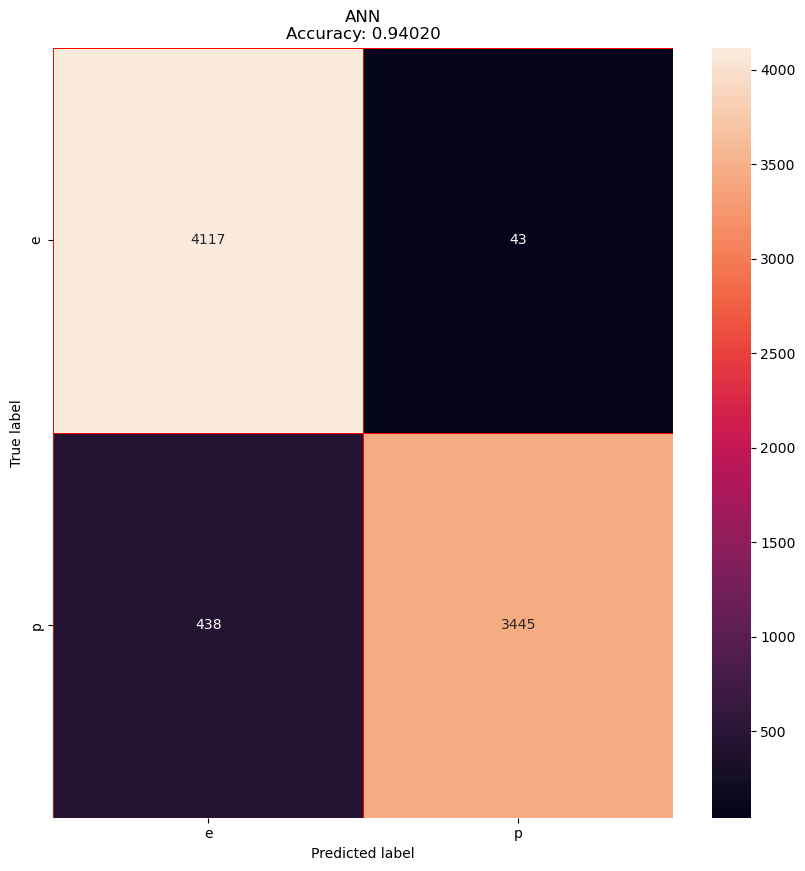

In [113]:
# Transform the confusion matrix to a DataFrame for easier plotting
cm_df = pd.DataFrame(cm, index=["e", "p"], columns=["e", "p"])

# Plot the confusion matrix as a heatmap
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm_df, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.title(f"ANN\nAccuracy: {accuracy_score(y_test, y_pred):.5f}")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [114]:
# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate the F1 score and store it in a variable
f1 = f1_score(y_test, y_pred)

# Print the F1 score
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4160
           1       0.99      0.89      0.93      3883

    accuracy                           0.94      8043
   macro avg       0.95      0.94      0.94      8043
weighted avg       0.94      0.94      0.94      8043

F1 Score: 0.9347442680776014
